In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import MDAnalysis as mda
import string

# Plot of the radial coordinate

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1758/2445792332.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  rho = plumed.read_as_pandas("rtp_coord.dat")


Text(0, 0.5, '$\\rho$ [nm]')

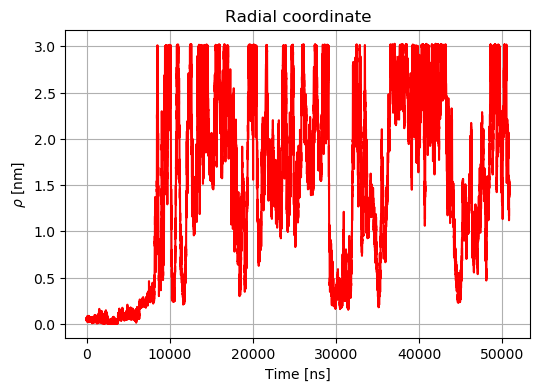

In [9]:
rho = plumed.read_as_pandas("rtp_coord.dat")
plt.plot(rho["time"], rho["rho"], 'r')
plt.grid()
plt.title("Radial coordinate")
plt.xlabel("Time [ns]")
plt.ylabel(r"$\rho$ [nm]")

# Heights of the Gaussians and positions

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1403/2116629073.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  HILLS = plumed.read_as_pandas("HILLS_shared")


Text(0, 0.5, 'Height [kJ/mol]')

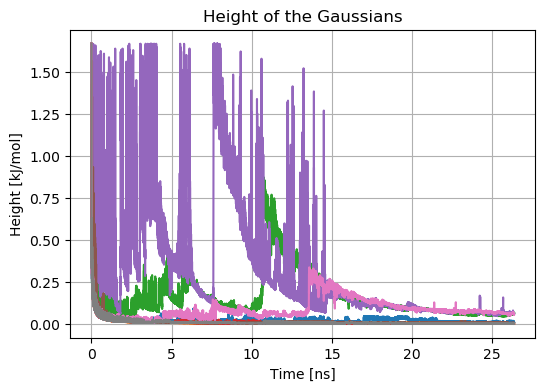

In [13]:
HILLS = plumed.read_as_pandas("HILLS_shared")
plt.plot(HILLS["time"][0::8]/1000, HILLS["height"][0::8])
plt.plot(HILLS["time"][1::8]/1000, HILLS["height"][1::8])
plt.plot(HILLS["time"][2::8]/1000, HILLS["height"][2::8])
plt.plot(HILLS["time"][3::8]/1000, HILLS["height"][3::8])
plt.plot(HILLS["time"][4::8]/1000, HILLS["height"][4::8])
plt.plot(HILLS["time"][5::8]/1000, HILLS["height"][5::8])
plt.plot(HILLS["time"][6::8]/1000, HILLS["height"][6::8])
plt.plot(HILLS["time"][7::8]/1000, HILLS["height"][7::8])
plt.grid()
plt.title("Height of the Gaussians")
plt.xlabel("Time [ns]")
plt.ylabel("Height [kJ/mol]")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1403/1727533483.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  HILLS = plumed.read_as_pandas("HILLS_shared")


Text(0, 0.5, 'Distance Oxy-Ca2+ [nm]')

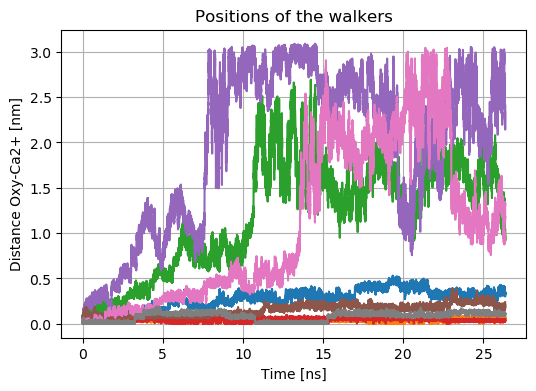

In [12]:
HILLS = plumed.read_as_pandas("HILLS_shared")
plt.plot(HILLS["time"][0::8]/1000, HILLS["d1"][0::8])
plt.plot(HILLS["time"][1::8]/1000, HILLS["d1"][1::8])
plt.plot(HILLS["time"][2::8]/1000, HILLS["d1"][2::8])
plt.plot(HILLS["time"][3::8]/1000, HILLS["d1"][3::8])
plt.plot(HILLS["time"][4::8]/1000, HILLS["d1"][4::8])
plt.plot(HILLS["time"][5::8]/1000, HILLS["d1"][5::8])
plt.plot(HILLS["time"][6::8]/1000, HILLS["d1"][6::8])
plt.plot(HILLS["time"][7::8]/1000, HILLS["d1"][7::8])
plt.grid()
plt.title("Positions of the walkers")
plt.xlabel("Time [ns]")
plt.ylabel("Distance Oxy-Ca2+ [nm]")

# Reading the `HILLS` file 

The profile obtained as a function of $\rho$ (marginalizing $\theta$ and $\phi$) has to be corrected:
$$
\Delta G^0_b=\Delta G_{\text{meta}}-RT\log \frac{V^0}{\frac{4\pi \rho_s^3}{3}-V_{\text{prot}}}
$$

How do we account for the entropic correction? 


/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1403/3747087816.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

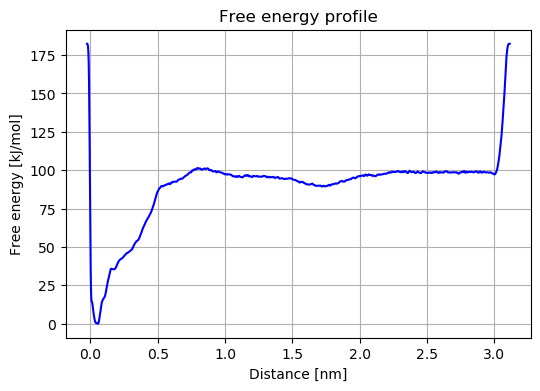

In [2]:
plt.rcParams["figure.figsize"] = (6, 4)
fes = plumed.read_as_pandas("fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'b')
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

# Evolution of the profile in time

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1403/1567369827.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1403/1567369827.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1403/1567369827.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1403/1567369827.py:10: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("fes.dat")


Text(0, 0.5, 'Free energies [kJ/mol]')

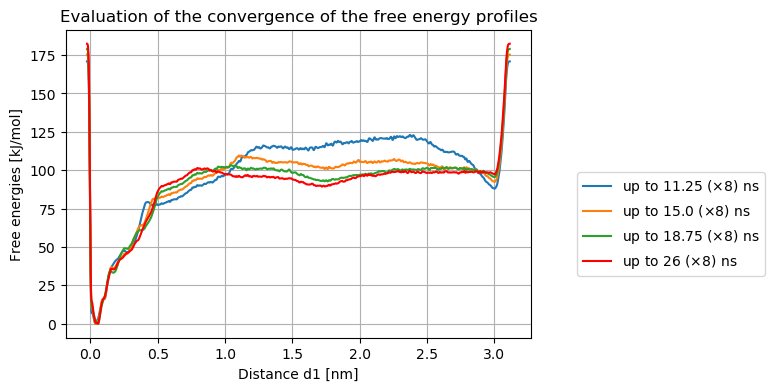

In [9]:
# 147696 kernels --> circa 18 ns

stride = 30000

for i in range(3, 6):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
    plt.plot(data["d1"],data["file.free"], label="up to "+str(i/8 * stride/1000)+r" ($\times$8) ns")

fes = plumed.read_as_pandas("fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'r', label=r"up to 26 ($\times$8) ns")

plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
plt.legend(loc=(1.1, 0.2))
plt.xlabel("Distance d1 [nm]")
plt.ylabel("Free energies [kJ/mol]")

